# **Experiment Notebook**



---
## Setup Environment

In [1]:
# DO NOT MODIFY THE CODE IN THIS CELL
!pip install -q utstd

from utstd.folders import *
from utstd.ipyrenders import *

at = AtFolder(
    course_code=36106,
    assignment="AT2",
)
at.run()

import warnings
warnings.simplefilter(action='ignore')


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



You can now save your data files in: c:\Users\brohao\Desktop\UTS\36106\ClassificationModels-36106-AT2\36106\assignment\AT2\data


---
## Student Information


In [ ]:
# <Student to fill this section and then remove this comment>
student_name = "JiayuHao"
student_id = "25948860"

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h1", key='student_name', value=student_name)

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h1", key='student_id', value=student_id)

---
## 0. Python Packages

### 0.a Install Additional Packages

> If you are using additional packages, you need to install them here using the command: `! pip install <package_name>`

In [11]:
# <Student to fill this section and then remove this comment>
import numpy as np
import matplotlib.pyplot as plt

### 0.b Import Packages

In [3]:
# DO NOT MODIFY THE CODE IN THIS CELL
import pandas as pd
import altair as alt

---
## A. Project Description


In [ ]:
# <Student to fill this section and then remove this comment>
# Explain clearly what is the goal of this project for the business. How will the results be used? What will be the impact of accurate or incorrect results?
business_objective = """
**Business Goal / 商业目标：**  
本项目旨在预测银行客户的信用评级（`Poor`, `Standard`, `Good`）。  
- 银行将利用预测结果进行：  
  - 客户信用风险分层  
  - 个性化产品推荐  
  - 调整现有账户条件（如利率、额度）  

**Impact / 影响：**  
- **准确预测**：提升风险控制水平，减少坏账率，提高交叉销售效果。  
- **错误预测**：  
  - **误判高风险客户为低风险** → 造成资金损失。  
  - **误判低风险客户为高风险** → 降低客户满意度、损失潜在收益。  
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='business_objective', value=business_objective)

---
## B. Dataset Understanding (Global Interpretation)

In [6]:
# DO NOT MODIFY THE CODE IN THIS CELL
try:
  df = pd.read_csv(at.folder_path / "credit_rating.csv")
except Exception as e:
  print(e)

In [7]:
print("Shape of dataset:", df.shape)   # rows * columns

# Overview of data types and non-null counts
print("\nDataset Info:")
print(df.info())

# First few rows
print("\nFirst 5 rows of testing set:")
pd.set_option("display.max_columns", None)
display(df.head())

# Summary statistics for numerical features
print("\nSummary statistics for numerical variables:")
display(df.describe().T)

# Summary for categorical features
print("\nUnique values count for categorical variables:")
categorical_cols = df.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

# Missing values
print("\nMissing values per column:")
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
display(missing)

# Duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

Shape of dataset: (12500, 48)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_id                 12500 non-null  object 
 1   prefix                      12500 non-null  object 
 2   full_name                   12500 non-null  object 
 3   gender                      12500 non-null  object 
 4   dob                         12500 non-null  object 
 5   age                         12500 non-null  int64  
 6   birth_country               12500 non-null  object 
 7   email                       12500 non-null  object 
 8   phone_number                12500 non-null  object 
 9   secondary_address           12500 non-null  object 
 10  building_number             12500 non-null  int64  
 11  street_name                 12500 non-null  object 
 12  street_suffix               12500 non-null 

,customer_id,prefix,full_name,gender,dob,age,birth_country,email,phone_number,secondary_address,building_number,street_name,street_suffix,city,postcode,state_abbr,occupation,annual_income,count_bank_accounts,count_credit_cards,cc_number,cc_expiry,cc_security_code,cc_interest_rate,loans_count,avg_days_past_due,count_delayed_payment,credit_limit_change,count_credit_inquiries,credit_mix,outstanding_debt,credit_ratio,count_credit_history_years,min_amount_payment,monthly_emi_payment,_monthly_invested_amount,payment_behaviour,monthly_balance,last_9_loan_type,last_8_loan_type,last_7_loan_type,last_6_loan_type,last_5_loan_type,last_4_loan_type,last_3_loan_type,last_2_loan_type,last_1_loan_type,credit_rating
0,5bd44cee-f2d0-457f-9b79-1fdd894da18c,Mr.,Kevin Moon,m,1993-12-06,31,AU,kimberlypark@example.org,(08)35431944,Unit 93,0,April Amble,Brow,Chaneyborough,8442,QLD,Journalist,22229.060,6,4,2271879300837817,11/31,104,5.0,3,10,10,9.44,9,Standard,1396.14,33.061861,156,Yes,52.138474,44.084010,High_spent_Medium_value_payments,321.019683,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Debt Consolidation Loan,Standard
1,9cb378bd-57f0-4613-a987-b95bbdb84f8f,Dr.,Matthew May-Lewis,m,1981-10-21,43,NZ,garciathomas@example.net,0485 357 742,Level 2,43,Davis Crest,Rest,Andrewborough,2652,TAS,Musician,17060.705,8,3,349101291688485,09/30,661,11.0,4,24,8,9.64,2,Standard,268.81,36.377621,269,Yes,51.934634,39.628311,Low_spent_Small_value_payments,327.009597,No Loan,No Loan,No Loan,No Loan,No Loan,Debt Consolidation Loan,Home Equity Loan,Auto Loan,Auto Loan,Standard
2,0e0b24e2-74d7-48f1-9b45-e6cfbf79dbff,Dr.,Donald Sanchez,m,2001-06-15,24,AU,qlee@example.org,20356212,937/,96,Emily Little,Drive,New Chadbury,2955,NSW,Accountant,34428.210,2,4,4634389038551183,08/30,977,8.0,0,3,12,8.51,0,Good,180.70,39.917508,326,No,0.000000,84.774645,High_spent_Small_value_payments,432.727105,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Good
3,d45b3167-77e6-4b2a-96f3-a9bf2ee07621,Mr.,Jonathan Thornton,m,2004-01-23,21,AU,cmorgan@example.com,0627-6253,Level 3,5,William Pathway,Circle,Elliottside,2381,WA,Accountant,12613.920,4,6,30359329057818,08/34,729,13.0,3,14,17,17.51,3,Standard,569.11,39.841494,376,Yes,16.941903,41.943603,Low_spent_Medium_value_payments,346.630494,No Loan,No Loan,No Loan,No Loan,No Loan,No Loan,Personal Loan,Student Loan,Home Equity Loan,Standard
4,79a17520-248e-4bea-92b8-22c78d968172,Mr.,Yasmin Agarwal,m,1993-11-14,31,IN,xtodd@example.com,9957-3583,00/,5,Martin Close,Part,Gonzalezberg,3048,TAS,Journalist,34775.160,7,9,375257503725320,05/33,202,25.0,5,20,20,17.16,6,Bad,3003.45,36.058472,162,Yes,126.596814,67.970377,High_spent_Medium_value_payments,360.325808,No Loan,No Loan,No Loan,No Loan,Auto Loan,Mortgage Loan,Auto Loan,Payday Loan,Not Specified,Poor



Summary statistics for numerical variables:


,count,mean,std,min,25%,50%,75%,max
age,12500.0,3.330664e+01,1.076736e+01,1.400000e+01,2.400000e+01,3.300000e+01,4.200000e+01,5.600000e+01
building_number,12500.0,1.805667e+02,2.772560e+02,0.000000e+00,6.000000e+00,4.250000e+01,2.320000e+02,9.990000e+02
postcode,12500.0,3.168209e+03,1.811336e+03,2.000000e+02,2.602000e+03,2.694000e+03,2.968000e+03,9.996000e+03
annual_income,12500.0,5.050512e+04,3.830076e+04,7.005930e+03,1.934297e+04,3.699971e+04,7.168347e+04,1.799873e+05
count_bank_accounts,12500.0,5.368880e+00,2.594931e+00,0.000000e+00,3.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
count_credit_cards,12500.0,5.533760e+00,2.068024e+00,0.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,1.100000e+01
cc_number,12500.0,3.750285e+17,1.242247e+18,6.040204e+10,3.896755e+13,3.515906e+15,4.690149e+15,4.999833e+18
cc_security_code,12500.0,8.794893e+02,1.536073e+03,0.000000e+00,2.660000e+02,5.420000e+02,8.140000e+02,9.992000e+03
cc_interest_rate,12500.0,1.453208e+01,8.741636e+00,1.000000e+00,7.000000e+00,1.300000e+01,2.000000e+01,3.400000e+01
loans_count,12500.0,3.532880e+00,2.446442e+00,0.000000e+00,2.000000e+00,3.000000e+00,5.000000e+00,9.000000e+00



Unique values count for categorical variables:
customer_id: 12500 unique values
prefix: 5 unique values
full_name: 11614 unique values
gender: 2 unique values
dob: 8380 unique values
birth_country: 13 unique values
email: 12169 unique values
phone_number: 12500 unique values
secondary_address: 2659 unique values
street_name: 11712 unique values
street_suffix: 200 unique values
city: 9369 unique values
state_abbr: 8 unique values
occupation: 15 unique values
cc_expiry: 121 unique values
credit_mix: 3 unique values
min_amount_payment: 2 unique values
payment_behaviour: 6 unique values
last_9_loan_type: 10 unique values
last_8_loan_type: 10 unique values
last_7_loan_type: 10 unique values
last_6_loan_type: 10 unique values
last_5_loan_type: 10 unique values
last_4_loan_type: 10 unique values
last_3_loan_type: 10 unique values
last_2_loan_type: 10 unique values
last_1_loan_type: 10 unique values
credit_rating: 3 unique values

Missing values per column:


Series([], dtype: int64)


Number of duplicate rows: 0


In [ ]:
# Student Note: personal thinking
data_set_insights = """
The dataset has 12,500 rows and 48 columns.
数据无缺失与重复，但需要考虑“伪缺失/占位值”。
数据包含数值型和分类型，还有大量PII/识别性信息（如姓名、邮箱、电话、地址、信用卡号等），需要考虑隐私问题。

隐私问题:
明确的 PII / 与位置强相关且业务无关：customer_id, prefix, full_name, email, phone_number, secondary_address, building_number, street_name, street_suffix, city, postcode, state_abbr, dob。
隐私合规：去标识、最小化数据收集，提升伦理评分。
极高泄漏/反向因果风险：
cc_number, cc_security_code, cc_expiry：无业务解释力且隐私/风控风险极高。
cc_interest_rate：利率在现实中常由风险定价策略根据信用评级决定，与目标高度同源，强烈建议从主线实验中剔除，最多做对照实验。
credit_limit_change：额度变动往往是银行根据风险（含评级）做出的决策，存在后因变量→前因变量的倒置，建议剔除或在对照实验中单独评估。
credit_mix：取值为 Good / Standard / Bad，与目标 credit_rating（Good / Standard / Poor）标签体系高度相似，疑似“准标签”。建议两条线路：
1）主线：不使用 credit_mix；
2）对照线：使用 credit_mix，量化其“捷径效应”，并在报告中充分披露伦理与泛化风险。
时间语义相关：dob 与 age 冗余，优先保留 age、去除 dob；cc_expiry 含时间效应，对真实可用性与隐私均不友好。

Numerical issues: 
Outliers/Invalid values: 明显异常/边界值：
avg_days_past_due 最小值 -5（提前还款？还是录入错误）：建议按业务语义截断为 0或保留为“提前还款”二值特征。
monthly_emi_payment 最小值 -1：无物理意义，按缺失处理或设为 0 并打标。
单位/含义存疑：
count_credit_history_years 均值约 221，最大 404，“年”显然不合理，极可能是“月”。建议新建 credit_history_years = count_credit_history_years / 12 并在报告中记录该校正。
credit_ratio 范围约 20.9–48.2，看起来是百分比（%）。建议在可视化和特征工程中按百分比解释，并考虑以小数形式（/100）输入模型以一致化量纲。
Skewed variables长尾与偏态：annual_income、outstanding_debt、_monthly_invested_amount、monthly_balance 等均呈右偏与长尾，后续可考虑 log1p、Winsorize 或 RobustScaler 以稳定模型。

Categorical issues:
高基数字段（如 full_name, email, street_name, city 等）不具业务因果且隐私敏感，不纳入建模。

有“占位/未知”类别的字段（如各 last_k_loan_type 中的 "No Loan"、"Not Specified"），建议：

保留“未知/无”的专属类别，并统计其占比；

对 9 个最近贷款类型（last_1…last_9）不直接onehot，而是工程为低维表征：

最近一次贷款类型（last_1_loan_type）；

“高风险类型（如 Payday）是否近期出现”二值；

各类型的计数/占比；

贷款类型的多样性（熵）。
"""

---
## C. Feature Understanding (Local Interpretation)

### C.1 Explore Target Variable

> Save the name of column used as the target variable and call it `target_name`

> You can add more cells in this section

In [8]:
# <Student to fill this section and then remove this comment>

target_name = 'credit_rating'

credit_rating
Standard    6618
Poor        3646
Good        2236
Name: count, dtype: int64
credit_rating
Standard    0.52944
Poor        0.29168
Good        0.17888
Name: proportion, dtype: float64


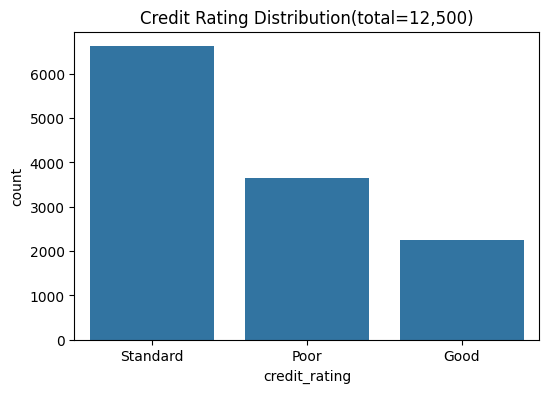

In [10]:
print(df[target_name].value_counts())
print(df[target_name].value_counts(normalize=True))

# 可视化
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x=target_name, data=df, order=df[target_name].value_counts().index)
plt.title("Credit Rating Distribution(total=12,500)")
plt.show()

In [ ]:
# 确保图表清晰 / Make plots sharper
plt.rcParams["figure.dpi"] = 120


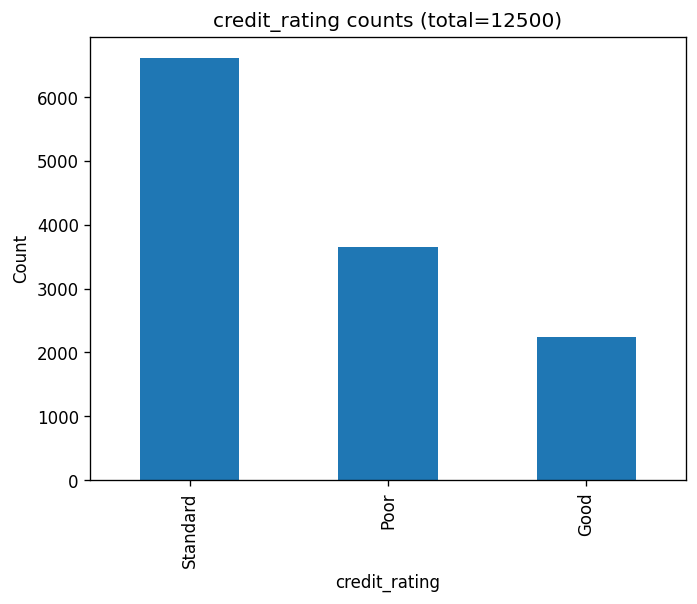

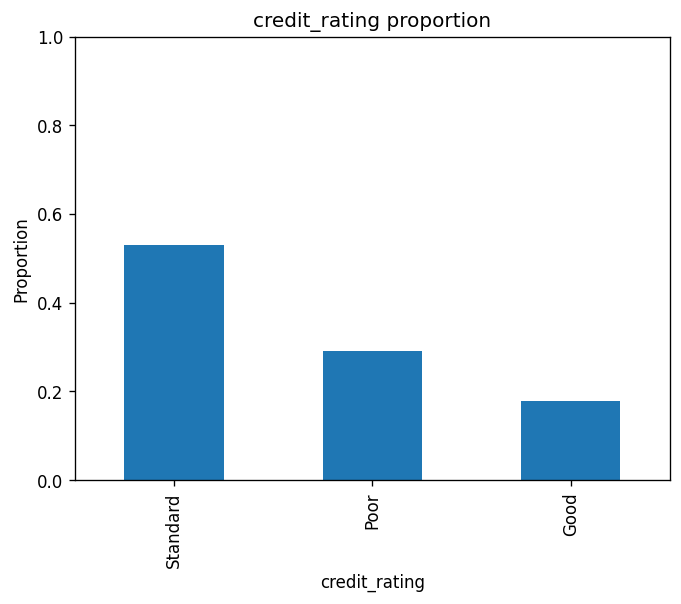

In [16]:
# 1) Target counts
plt.figure()
df[target_name].value_counts().plot(kind="bar")
plt.title(f"{target_name} counts (total={len(df)})")
plt.ylabel("Count")
plt.xlabel(target_name)
plt.show()


# 2) Target Proportion
plt.figure()
(df[target_name].value_counts(normalize=True)).plot(kind="bar")
plt.title(f"{target_name} proportion")
plt.ylabel("Proportion")
plt.ylim(0,1)
plt.show()

In [ ]:
# <Student to fill this section and then remove this comment>
# provide a detailed analysis on the target variable, its distribution, limitations, issues, ...
target_insights = """
目标变量（credit_rating）的深入分析
分布与不均衡
计数：Standard 6618、Poor 3646、Good 2236；占比：0.529 / 0.292 / 0.179。
目标变量的局限与风险
定义与构建不透明：不知道 credit_rating 的银行内部计算细节，可能与 credit_mix 等字段重复计分，需在报告中披露这一潜在循环依赖风险。
类别过于粗粒度（仅三档），可能掩盖中间风险层；模型的最优阈值与业务策略需在后续校准与阈值优化中体现。

仅预测standard就可以达到52.9%的正确率，需要注意零基线。
注意把“Poor”错判为“Good/Standard”可能导致风险暴露；把“Good”错判为“Poor/Standard”则可能错失收益
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='target_insights', value=target_insights)

### C.2 Explore Feature of Interest `avg_days_past_due`

> You can add more cells in this section

In [18]:
# <Student to fill this section and then remove this comment>
feat = "avg_days_past_due"

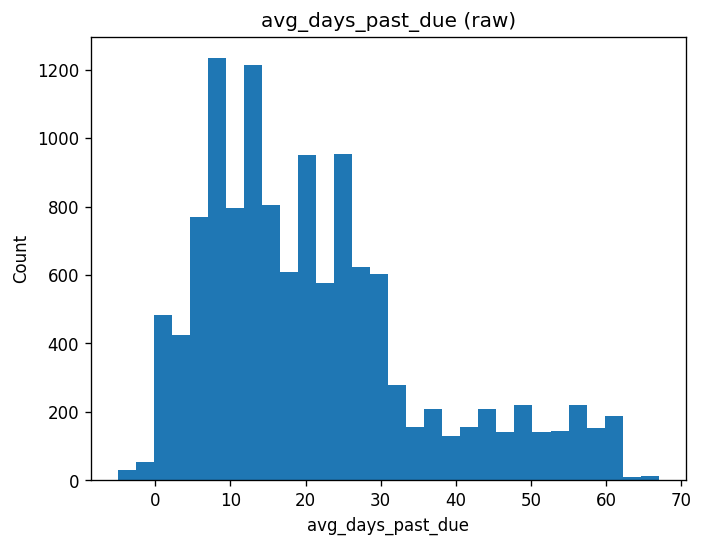

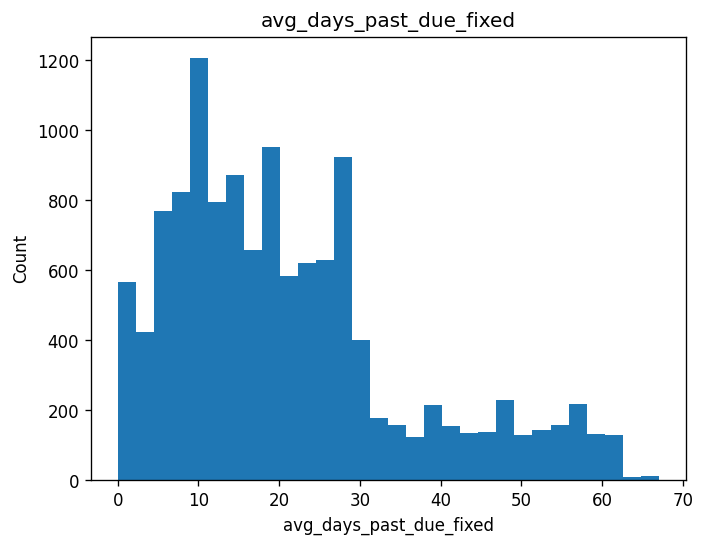

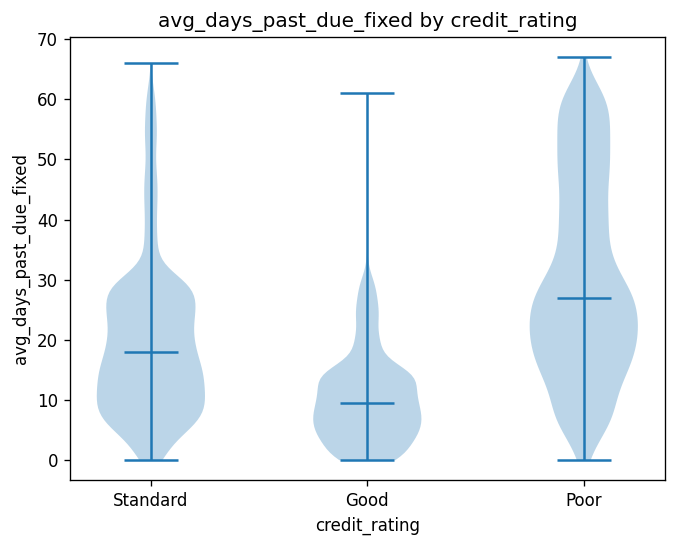

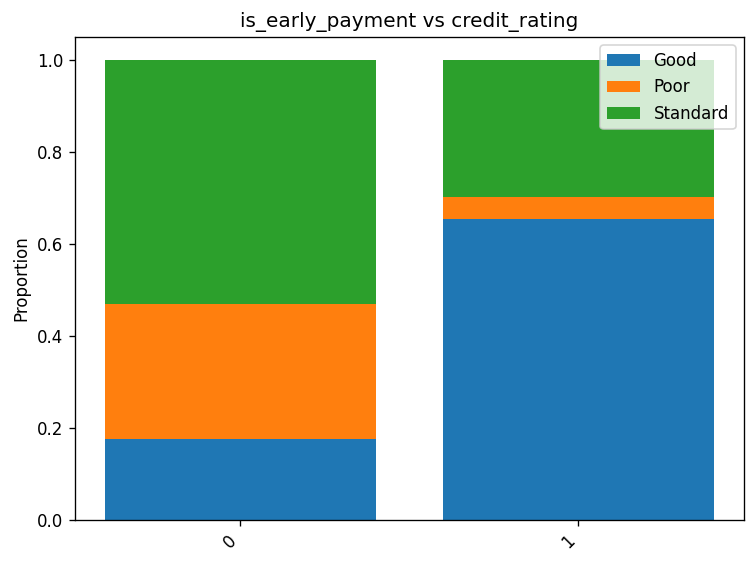

In [ ]:
# Student Note: 这里需要做
# 清洗 / Cleaning: 负值截断为0，并派生提前还款标识
df = df.copy()
df["avg_days_past_due_fixed"] = df["avg_days_past_due"].clip(lower=0)  # 负值→0 / negatives -> 0
df["is_early_payment"] = (df["avg_days_past_due"] < 0).astype(int)     # 是否出现提前还款标记 / early payment flag

# 整体直方图（原始&修正）/ Overall hist (raw & fixed)
plot_hist(df["avg_days_past_due"], "avg_days_past_due (raw)", bins=30, use_log1p=False)
plot_hist(df["avg_days_past_due_fixed"], "avg_days_past_due_fixed", bins=30, use_log1p=False)

# 分组分布（小提琴）/ Grouped violin
plot_group_violin(df, "avg_days_past_due_fixed", target_name, "avg_days_past_due_fixed by credit_rating")

# 提前还款占比 × 目标 / Early payment rate by target
plot_categorical_by_target(df, "is_early_payment", target_name, title="is_early_payment vs credit_rating")

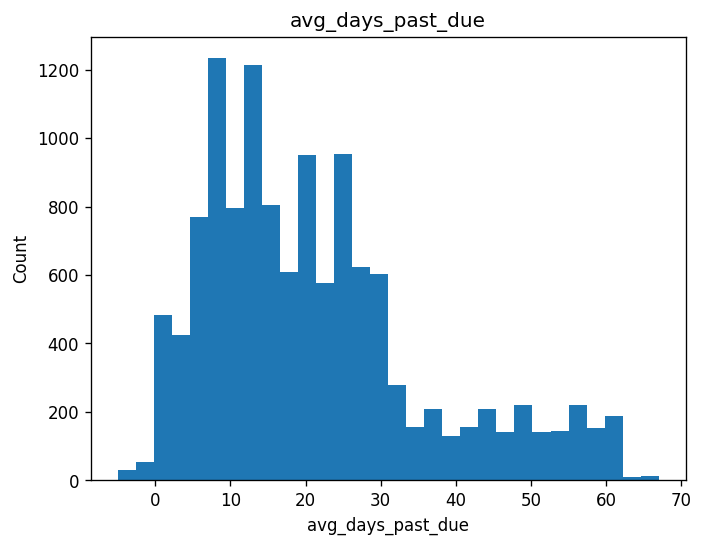

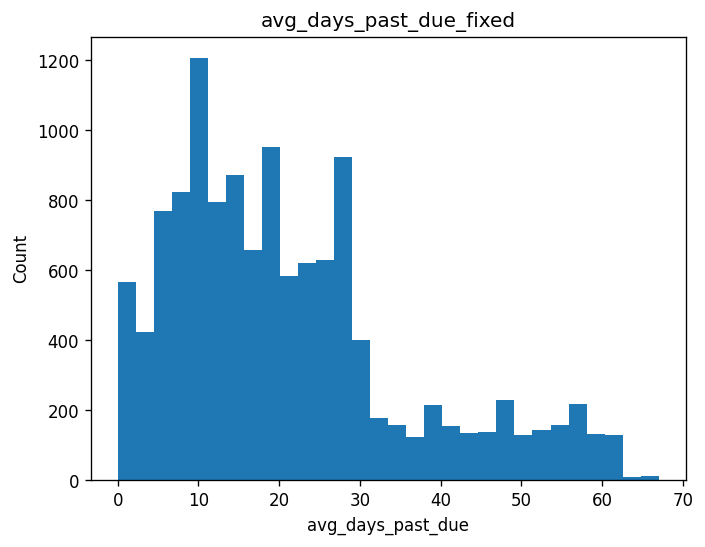

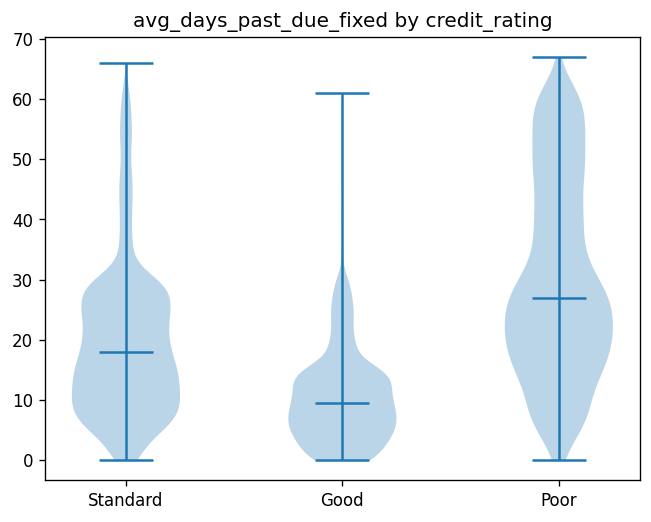

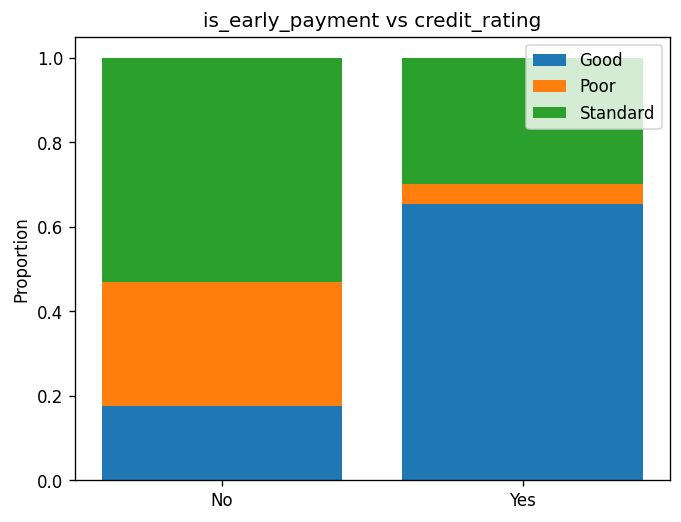

In [ ]:
# Overall hist (raw & fixed)
plt.figure()
plt.hist(df[feat].dropna(), bins=30)
plt.title(feat)
plt.xlabel(feat)
plt.ylabel("Count")
plt.show()
# Student Note: 小部分负值需要处理吗？需要新建binary吗？
plt.figure()
plt.hist(df[feat+"_fixed"].dropna(), bins=30)
plt.title(feat+"_fixed")
plt.xlabel(feat)
plt.ylabel("Count")
plt.show()

# Violin by class
groups = [df.loc[df["credit_rating"]==c, feat+"_fixed"].dropna().values for c in df["credit_rating"].unique()]
plt.figure()
plt.violinplot(groups, showmedians=True)
plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique())
plt.title(feat+"_fixed by credit_rating")
plt.show()

# Binary vs target (stacked)
ser = df["is_early_payment"].map({0:"No",1:"Yes"})
ct = (pd.crosstab(ser, df["credit_rating"], normalize="index"))
plt.figure()
bottom = np.zeros(len(ct))
for cls in ct.columns: 
    plt.bar(range(len(ct)), ct[cls].values, bottom=bottom, label=cls)
    bottom += ct[cls].values
plt.xticks(range(len(ct)), ct.index)
plt.ylabel("Proportion")
plt.title("is_early_payment vs credit_rating")
plt.legend()
plt.show()

In [ ]:
# <Student to fill this section and then remove this comment>
feature_1_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.3 Explore Feature of Interest `count_delayed_payment`

> You can add more cells in this section

In [21]:
# <Student to fill this section and then remove this comment>
feat = "count_delayed_payment"

In [22]:
df["late_rate"] = df[feat] / np.maximum(df["loans_count"], 1)

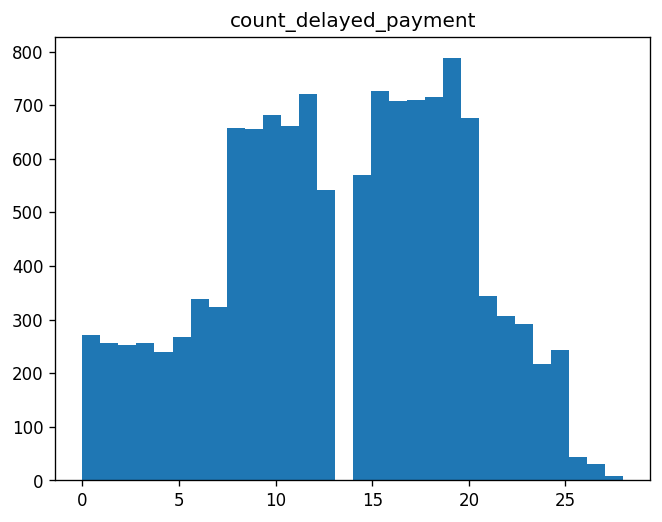

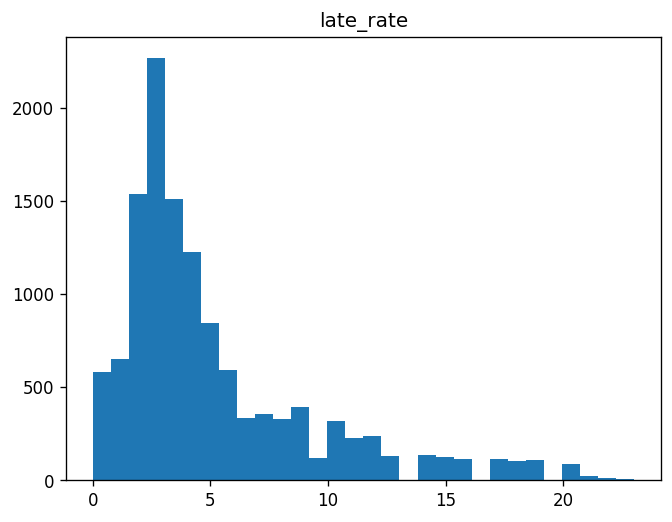

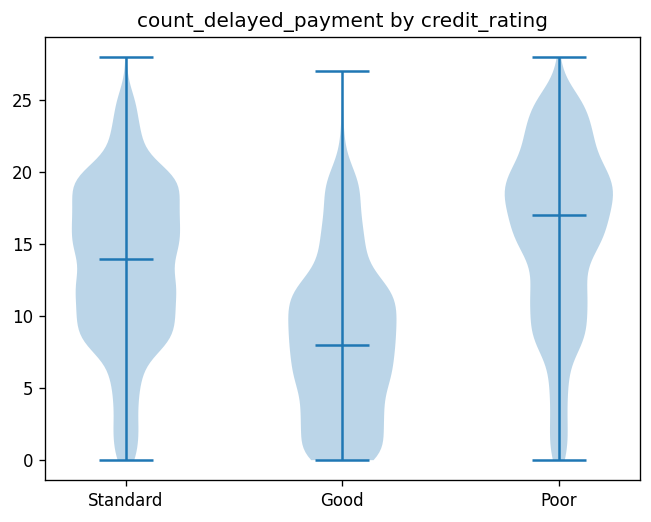

In [23]:
# 分布 / Distribution
plt.figure()
plt.hist(df[feat].dropna(), bins=30)
plt.title(feat)
plt.show()

plt.figure()
plt.hist(df["late_rate"].dropna(), bins=30)
plt.title("late_rate")
plt.show()

# 分组小提琴 / Violin
groups = [df.loc[df["credit_rating"]==c, feat].dropna().values for c in df["credit_rating"].unique()]
plt.figure()
plt.violinplot(groups, showmedians=True)
plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique())
plt.title(feat+" by credit_rating")
plt.show()

In [ ]:
# <Student to fill this section and then remove this comment>

feature_2_insights = """
provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.4 Explore Feature of Interest `count_credit_inquiries`

> You can add more cells in this section

In [24]:
# <Student to fill this section and then remove this comment>
feat = "count_credit_inquiries"

In [25]:
df["inq_ge_8"] = (df[feat] >= 8).astype(int)

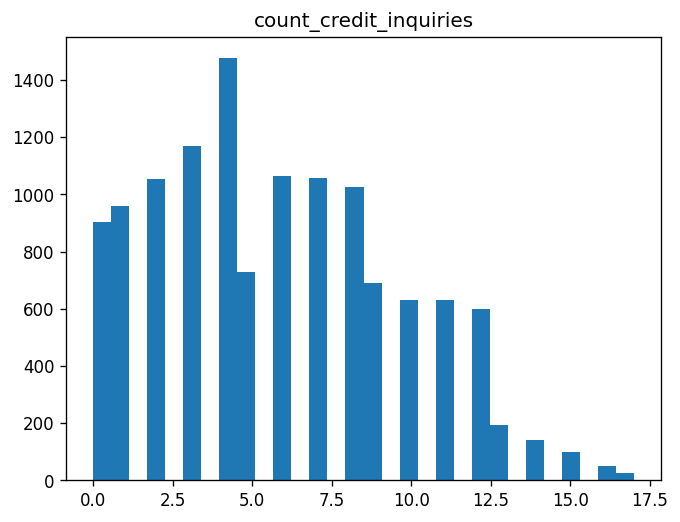

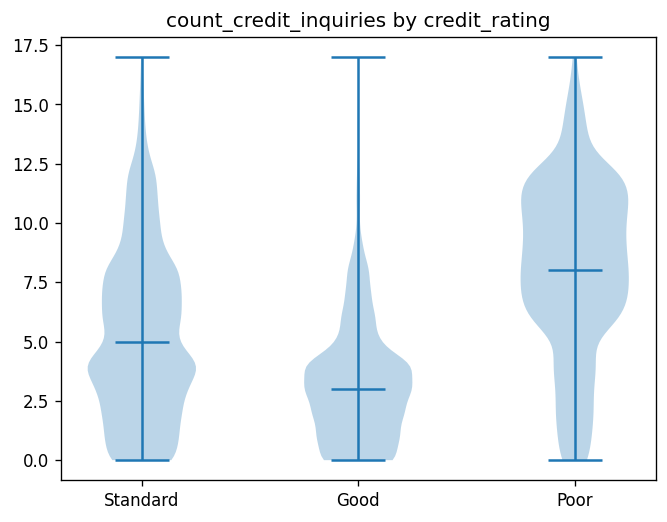

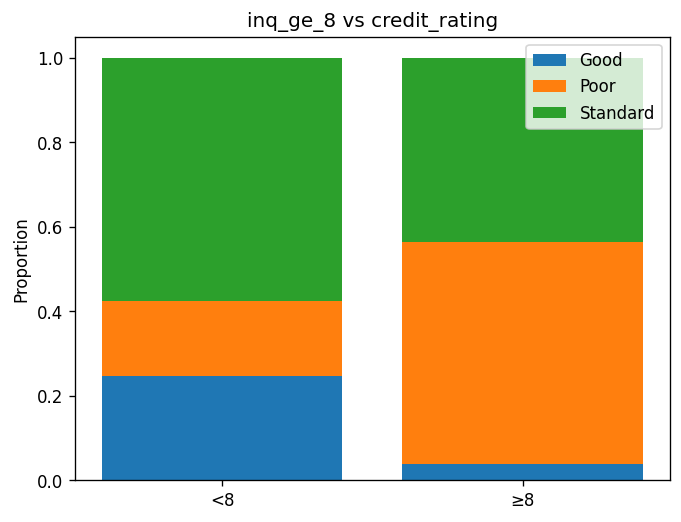

In [ ]:
# 分布 + 高阈值标记 / Distribution + high-threshold flag
plt.figure(); plt.hist(df[feat].dropna(), bins=30); plt.title(feat); plt.show()

groups = [df.loc[df["credit_rating"]==c, feat].dropna().values for c in df["credit_rating"].unique()]
plt.figure(); plt.violinplot(groups, showmedians=True); plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique()); plt.title(feat+" by credit_rating"); plt.show()

ct = pd.crosstab(df["inq_ge_8"].map({0:"<8",1:"≥8"}), df["credit_rating"], normalize="index")
plt.figure(); bottom = np.zeros(len(ct))
for cls in ct.columns: plt.bar(range(len(ct)), ct[cls].values, bottom=bottom, label=cls); bottom += ct[cls].values
plt.xticks(range(len(ct)), ct.index); plt.ylabel("Proportion"); plt.title("inq_ge_8 vs credit_rating"); plt.legend(); plt.show()

In [ ]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_3_insights = """
Most people have 0–8 inquiries, with a few above 12. 
Good customers usually have fewer than 5.
Standard customers are in the middle. 
Poor customers often have 8 or more. 
This feature may be affected by short-term events, not always show long-term habits. 
Still, it is a strong signal for credit risk.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

### C.5 Explore Feature of Interest `credit_ratio`

> You can add more cells related to other feeatures in this section

In [27]:
# <Student to fill this section and then remove this comment>
feat = "credit_ratio"

In [28]:
df["util_gt_35"] = (df[feat] > 35).astype(int)

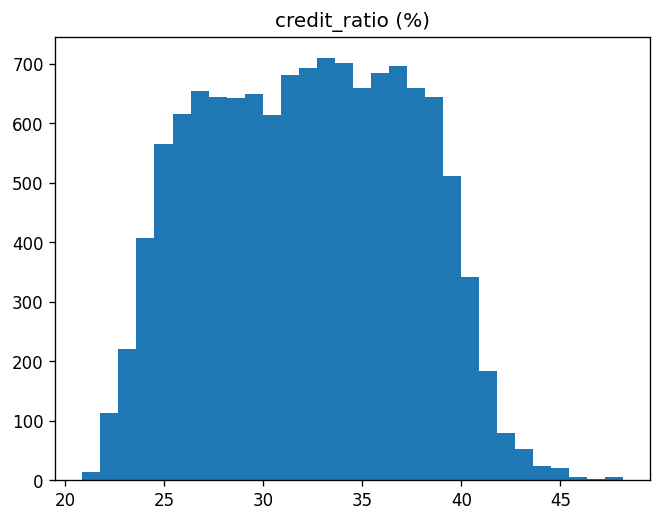

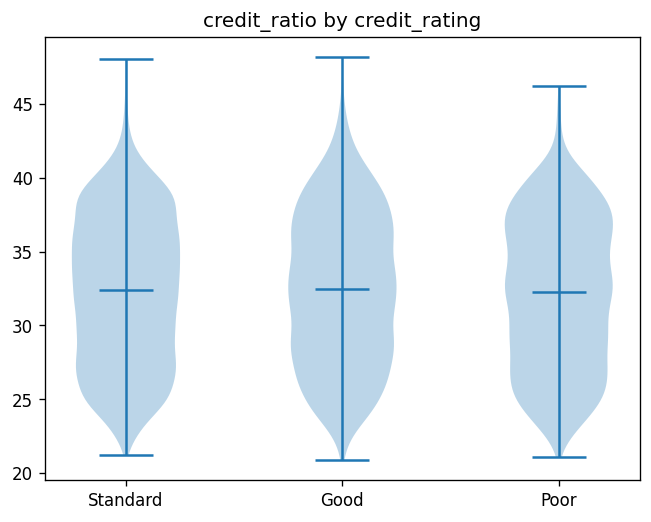

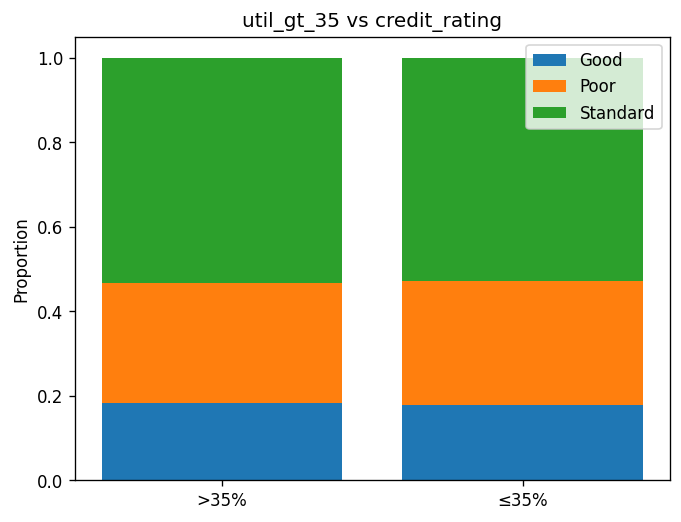

In [ ]:
# 分布 + 分档 / Distribution + binning
plt.figure(); plt.hist(df[feat].dropna(), bins=30); plt.title(feat+" (%)"); plt.show()

groups = [df.loc[df["credit_rating"]==c, feat].dropna().values for c in df["credit_rating"].unique()]
plt.figure(); plt.violinplot(groups, showmedians=True); plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique()); plt.title(feat+" by credit_rating"); plt.show()

ct = pd.crosstab(df["util_gt_35"].map({0:"≤35%",1:">35%"}), df["credit_rating"], normalize="index")
plt.figure(); bottom = np.zeros(len(ct))
for cls in ct.columns: plt.bar(range(len(ct)), ct[cls].values, bottom=bottom, label=cls); bottom += ct[cls].values
plt.xticks(range(len(ct)), ct.index); plt.ylabel("Proportion"); plt.title("util_gt_35 vs credit_rating"); plt.legend(); plt.show()

In [ ]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_4_insights = """
Most people use 25%–40% of their credit. The shape looks like a normal distribution. 
Poor customers are slightly more common above 35%. 
This feature may change from month to month, doesn't show if high use is short or long term. 
It has limited power alone, but can help as a warning signal when credit use is high.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_4_insights', value=feature_4_insights)

### C.6 Explore Feature of Interest `outstanding_debt`

> You can add more cells related to other feeatures in this section

In [46]:
feat = "outstanding_debt"

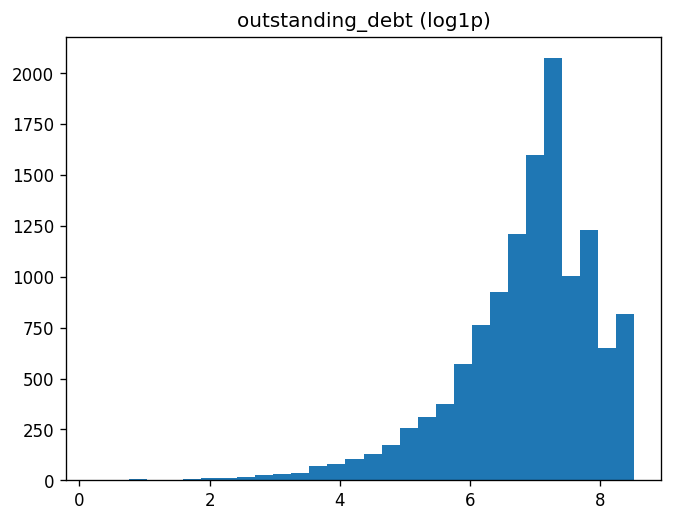

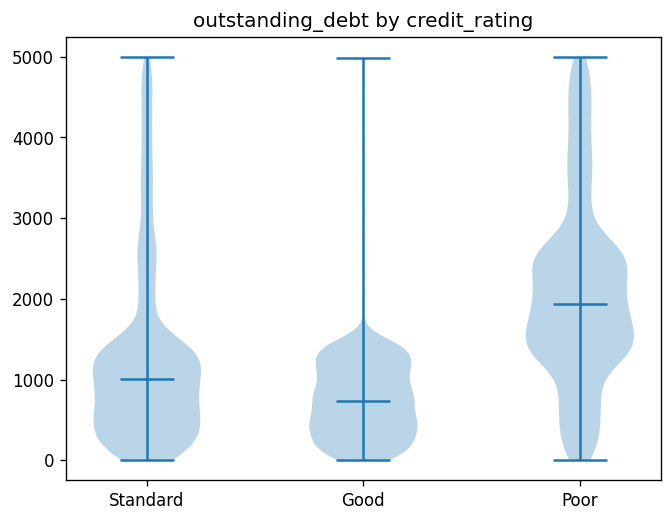

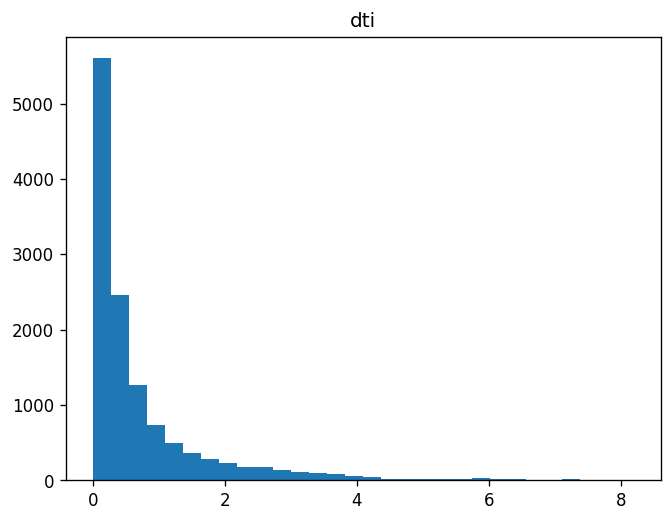

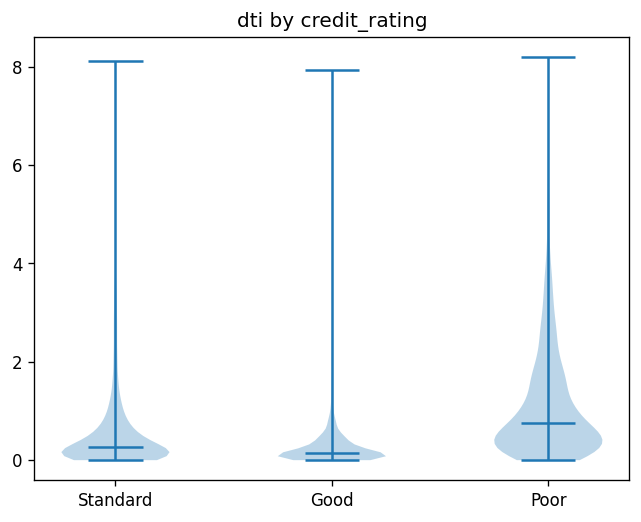

In [47]:
# 分布（log1p）+ DTI / Distribution (log1p) + DTI
plt.figure(); plt.hist(np.log1p(np.clip(df[feat].dropna(),0,None)), bins=30); plt.title(feat+" (log1p)"); plt.show()

groups = [df.loc[df["credit_rating"]==c, feat].dropna().values for c in df["credit_rating"].unique()]
plt.figure(); plt.violinplot(groups, showmedians=True); plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique()); plt.title(feat+" by credit_rating"); plt.show()

df["dti"] = (df[feat]*12) / (df["annual_income"] + 1e-6)
plt.figure(); plt.hist(df["dti"].dropna(), bins=30); plt.title("dti"); plt.show()

groups = [df.loc[df["credit_rating"]==c, "dti"].dropna().values for c in df["credit_rating"].unique()]
plt.figure(); plt.violinplot(groups, showmedians=True); plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique()); plt.title("dti"+" by credit_rating"); plt.show()


In [ ]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_5_insights = """
Debt amount is skewed, most people owe less than 2000, but some owe up to 5000. 
Poor customers tend to have higher debt. 
DTI shows debt compared to income, most DTI values are below 1.0. 
Poor customers have higher DTI, showing more stress. 
Together, they are strong risk signals. 
Debt alone misses context, but with income it shows true burden.
"""


In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_5_insights', value=feature_5_insights)

### C.7 Explore Feature of Interest `annual_income`

> You can add more cells related to other feeatures in this section

In [48]:
feat = "annual_income"

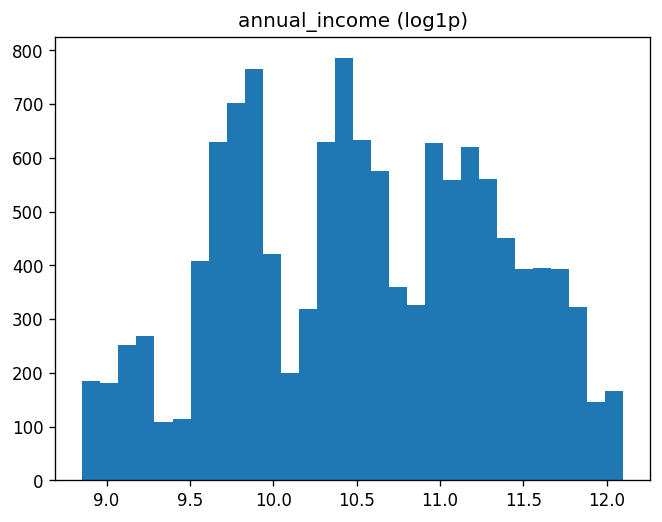

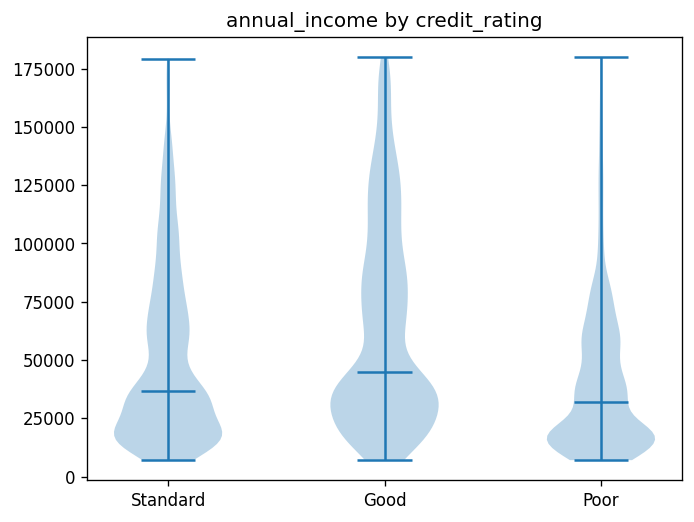

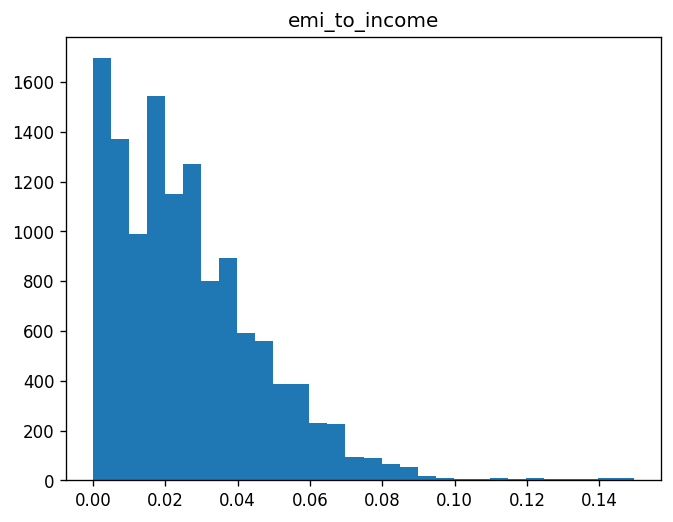

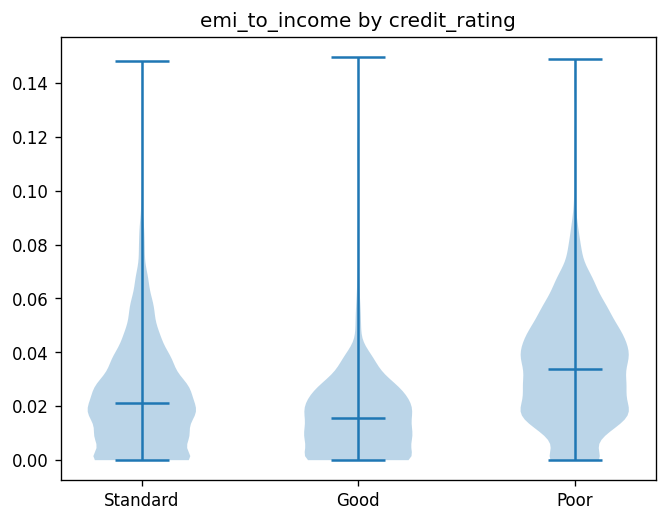

In [49]:
# 分布（log1p）+ 负担率 / Distribution (log1p) + burden ratio
plt.figure(); plt.hist(np.log1p(np.clip(df[feat].dropna(),0,None)), bins=30); plt.title(feat+" (log1p)"); plt.show()

groups = [df.loc[df["credit_rating"]==c, feat].dropna().values for c in df["credit_rating"].unique()]
plt.figure(); plt.violinplot(groups, showmedians=True); plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique()); plt.title(feat+" by credit_rating"); plt.show()

emi = df["monthly_emi_payment"].clip(lower=0)
df["emi_to_income"] = (emi*12.0)/(df[feat]+1e-6)
plt.figure(); plt.hist(df["emi_to_income"].dropna(), bins=30); plt.title("emi_to_income"); plt.show()



groups = [df.loc[df["credit_rating"]==c, "emi_to_income"].dropna().values for c in df["credit_rating"].unique()]
plt.figure(); plt.violinplot(groups, showmedians=True); plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique()); plt.title("emi_to_income"+" by credit_rating"); plt.show()


In [ ]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_6_insights = """
Income looks like a log-normal shape. 
Median income is about 37k, some go to 180k. 
Good customers earn more on average. 
Poor customers earn less. 
It does not show city or region, which matters. 
Income alone is not enough. 
But with debt or EMI it gives strong insight.

Most people spend less than 5% of income on EMI. 
A few spend over 10%. 
Higher EMI share means higher risk. 
Poor customers have more high ratios. 
EMI type is not clear, which is a limit. 
Income changes can also affect the ratio. 
Still, it is a useful warning sign.

Income is log-normal, with most people in the middle and some very high. 
Good customers earn more, Poor earn less. 
EMI to income ratio is usually under 5%. Poor customers have higher ratios. 
Income alone does not show risk, but with EMI it shows repayment ability. 
Together, they give strong financial insight.
"""

# Student Note: emi need to convert.

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_6_insights', value=feature_6_insights)

### C.8 Explore Feature of Interest `count_credit_history_years`

> You can add more cells related to other feeatures in this section

In [34]:
raw = "count_credit_history_years"

In [ ]:
#实际上根本不是年
df["credit_history_years"] = df[raw] / 12.0

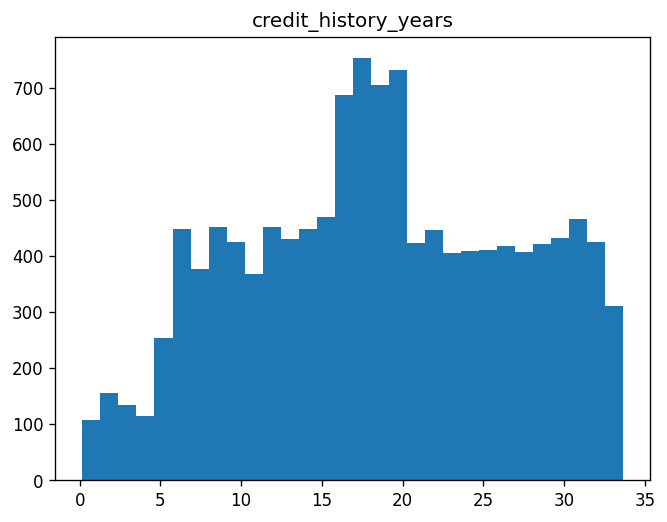

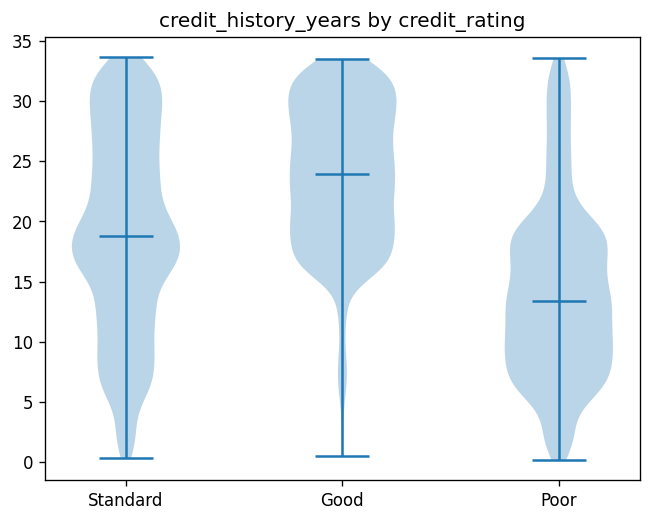

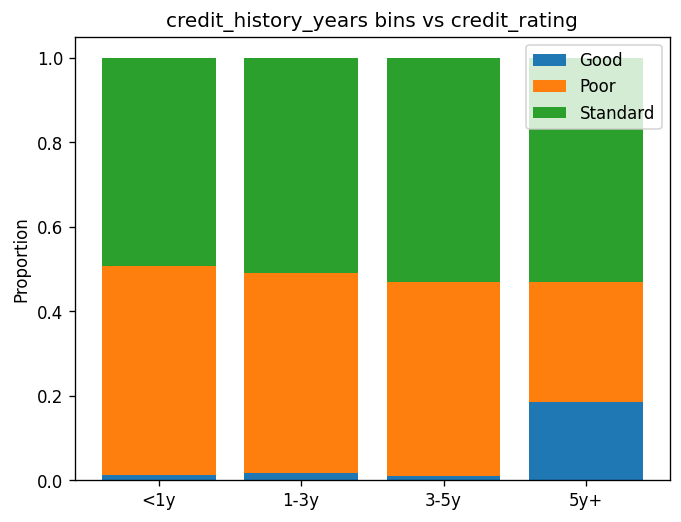

In [36]:
plt.figure(); plt.hist(df["credit_history_years"].dropna(), bins=30); plt.title("credit_history_years"); plt.show()

groups = [df.loc[df["credit_rating"]==c, "credit_history_years"].dropna().values for c in df["credit_rating"].unique()]
plt.figure(); plt.violinplot(groups, showmedians=True); plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique()); plt.title("credit_history_years by credit_rating"); plt.show()

bins = [-np.inf,1,3,5,np.inf]; labels = ["<1y","1-3y","3-5y","5y+"]
df["credit_hist_bin"] = pd.cut(df["credit_history_years"], bins=bins, labels=labels)
ct = pd.crosstab(df["credit_hist_bin"], df["credit_rating"], normalize="index")
plt.figure(); bottom = np.zeros(len(ct))
for cls in ct.columns: plt.bar(range(len(ct)), ct[cls].values, bottom=bottom, label=cls); bottom += ct[cls].values
plt.xticks(range(len(ct)), ct.index); plt.ylabel("Proportion"); plt.title("credit_history_years bins vs credit_rating"); plt.legend(); plt.show()

In [ ]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_7_insights = """
History spans from 1 to 30 years. Good customers have longer history, often 20+. Poor customers have shorter history. Standard is in the middle. The measure only shows total years. It ignores breaks or gaps in history. Still, it is a clear and strong predictor of risk.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_7_insights', value=feature_7_insights)

### C.9 Explore Feature of Interest `min_amount_payment`

> You can add more cells related to other feeatures in this section

In [37]:
feat = "min_amount_payment"

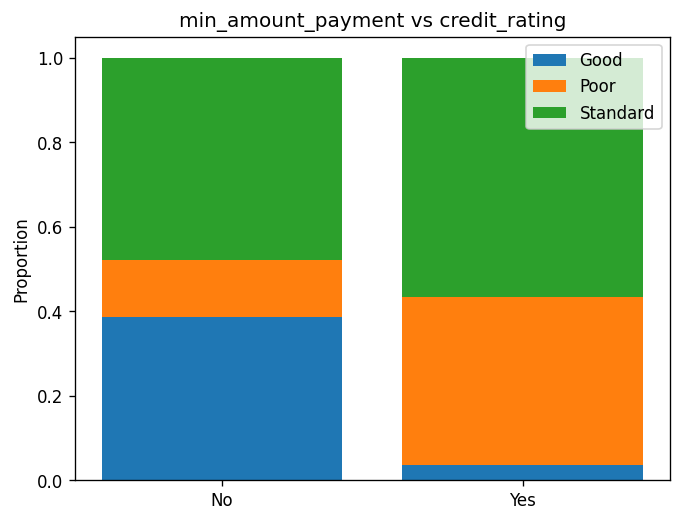

In [ ]:
# 类别与目标的比例关系 / Category vs target proportions
ct = pd.crosstab(df[feat].fillna("Missing"), df["credit_rating"], normalize="index")
plt.figure(); bottom = np.zeros(len(ct))
for cls in ct.columns: plt.bar(range(len(ct)), ct[cls].values, bottom=bottom, label=cls); bottom += ct[cls].values
plt.xticks(range(len(ct)), ct.index); plt.ylabel("Proportion"); plt.title(f"{feat} vs credit_rating"); plt.legend(); plt.show()

In [ ]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_8_insights = """
People split between Yes and No. Poor customers more often say Yes. Good customers more often say No. This shows that paying only the minimum is a risk. The data does not show if it is a habit or one-time. Still, it is a strong feature. It signals financial stress.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_8_insights', value=feature_8_insights)

### C.10 Explore Feature of Interest `payment_behavior`

> You can add more cells related to other feeatures in this section

In [39]:
feat = "payment_behaviour"

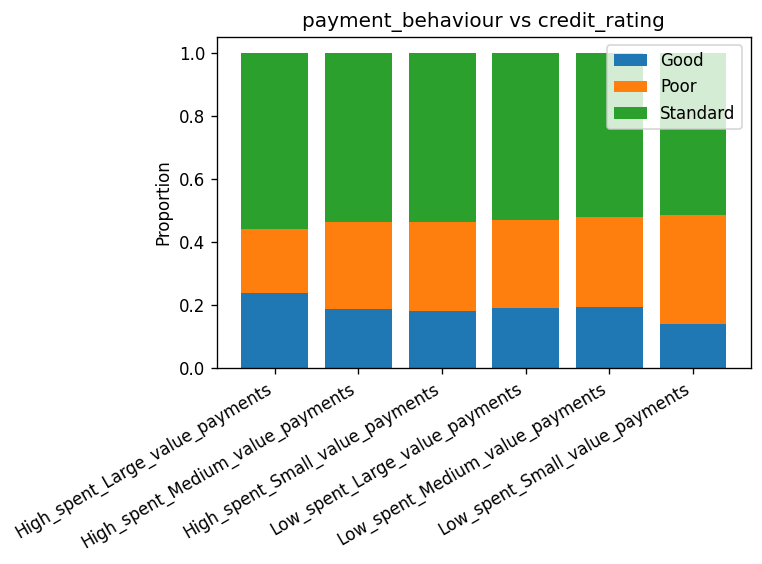

In [40]:
# 类别与目标 / Category vs target
ct = pd.crosstab(df[feat].fillna("Missing"), df["credit_rating"], normalize="index")
plt.figure(); bottom = np.zeros(len(ct))
for cls in ct.columns: plt.bar(range(len(ct)), ct[cls].values, bottom=bottom, label=cls); bottom += ct[cls].values
plt.xticks(range(len(ct)), ct.index, rotation=30, ha="right"); plt.ylabel("Proportion"); plt.title(f"{feat} vs credit_rating"); plt.legend(); plt.tight_layout(); plt.show()

In [ ]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_9_insights = """
There are six groups. High spend with big or medium payments links to Good and Standard. Low spend with small payments links to Poor. The categories are a bit vague. It is not always easy to explain. Still, it shows spending style and repayment style. It may help when grouped into fewer, clearer classes.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_9_insights', value=feature_9_insights)

### C.11 Explore Feature of Interest `loans_count`

> You can add more cells related to other feeatures in this section

In [41]:
# <Student to fill this section and then remove this comment>
feat = "loans_count"

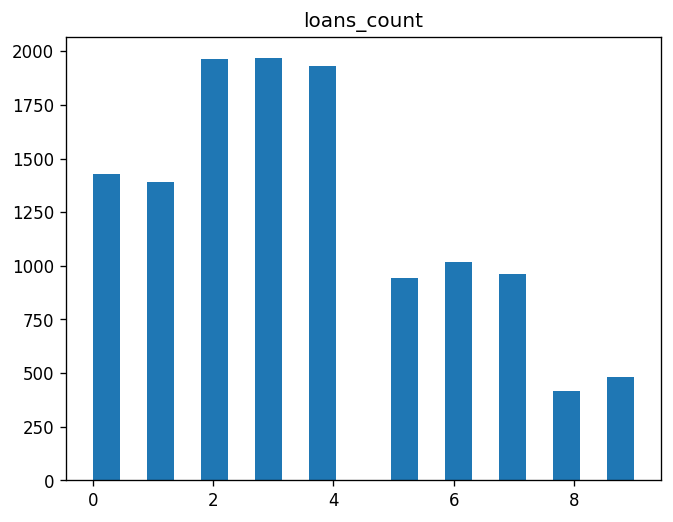

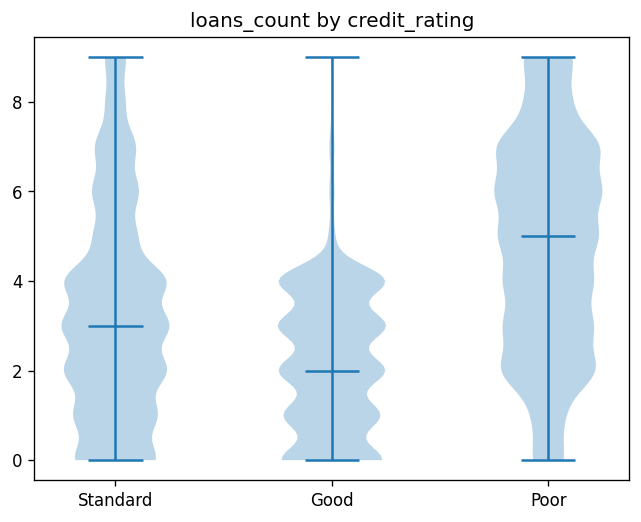

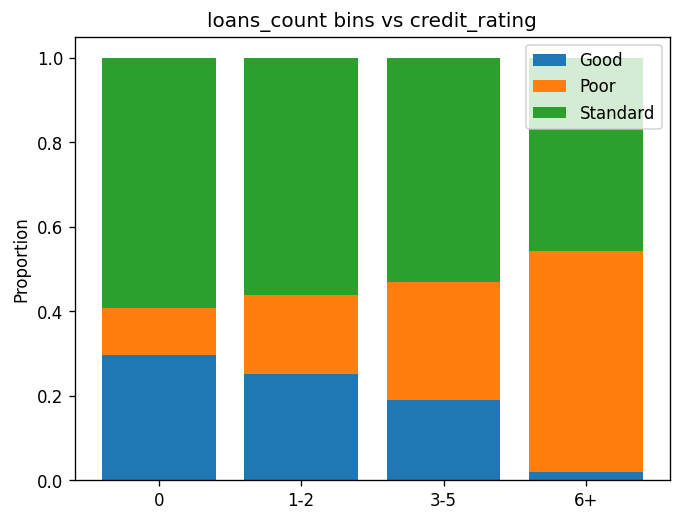

In [42]:
# 分布 + 分箱 / Distribution + binning
plt.figure(); plt.hist(df[feat].dropna(), bins=20); plt.title(feat); plt.show()

groups = [df.loc[df["credit_rating"]==c, feat].dropna().values for c in df["credit_rating"].unique()]
plt.figure(); plt.violinplot(groups, showmedians=True); plt.xticks(range(1,len(groups)+1), df["credit_rating"].unique()); plt.title(feat+" by credit_rating"); plt.show()

bins = [-np.inf,0,2,5,np.inf]; labels = ["0","1-2","3-5","6+"]
df["loans_count_bin"] = pd.cut(df[feat], bins=bins, labels=labels)
ct = pd.crosstab(df["loans_count_bin"], df["credit_rating"], normalize="index")
plt.figure(); bottom = np.zeros(len(ct))
for cls in ct.columns: plt.bar(range(len(ct)), ct[cls].values, bottom=bottom, label=cls); bottom += ct[cls].values
plt.xticks(range(len(ct)), ct.index); plt.ylabel("Proportion"); plt.title("loans_count bins vs credit_rating"); plt.legend(); plt.show()

In [ ]:
# provide a detailed analysis on the selected feature, its distribution, limitations, issues, ...

feature_10_insights = """
Most people have 2–4 loans. A few have more than 6. Good customers usually have 0–2. Poor customers often have 6+. It does not show loan type, which limits meaning. Still, many loans add risk. This feature is useful in rating credit.
"""

In [ ]:
# DO NOT MODIFY THE CODE IN THIS CELL
print_tile(size="h3", key='feature_10_insights', value=feature_10_insights)